### <div align="center"> Portfolio </div>
### <div align="center"> Yahoo Finance Dataset (Stock) </div>
<div align="center"> Adrianus Ezeekiel Dyarsa Amarta </div>


---

### Dataset yang dipakai:

1. Yahoo Finance Dataset (2018-2023) - Kaggle: https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023

---

### Hasil kerja

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [52]:
data_raw = pd.ExcelFile('C:\\Users\\Adrianus Ezeekiel\\Documents\\Portfolio\\Finance Analyst\\Data\\yahoo_data.xlsx')
data_raw.sheet_names

['Sheet1']

In [53]:
# Memuat data dari sheet pertama
df = data_raw.parse('Sheet1')

# menampilkan baris pertama untuk mengetahui struktur nya
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


(           Date      Open      High       Low    Close*  Adj Close**  \
 0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
 1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
 2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
 3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
 4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   
 
       Volume  
 0  354310000  
 1  343240000  
 2  321170000  
 3  297880000  
 4  252020000  ,
 None)

In [54]:
#Preprocessing
df['Date'] = pd.to_datetime(df['Date'])

duplicates = df.duplicated().sum()
df = df.drop_duplicates()

null_values = df.isnull().sum()

In [55]:
df = df.sort_values('Date') 
df['Daily Change'] = df['Close*'] - df['Close*'].shift(1)
df['Percentage Change'] = df['Close*'].pct_change() * 100
df['7-Day MA'] = df['Close*'].rolling(window=7).mean()
df['30-Day MA'] = df['Close*'].rolling(window=30).mean()

In [56]:
df['Volume Z-Score'] = zscore(df['Volume'])
df.head(), duplicates, null_values

(           Date      Open      High       Low    Close*  Adj Close**  \
 1257 2018-05-01  24117.29  24117.29  23808.19  24099.05     24099.05   
 1256 2018-05-02  24097.63  24185.52  23886.30  23924.98     23924.98   
 1255 2018-05-03  23836.23  23996.15  23531.31  23930.15     23930.15   
 1254 2018-05-04  23865.22  24333.35  23778.87  24262.51     24262.51   
 1253 2018-05-07  24317.66  24479.45  24263.42  24357.32     24357.32   
 
          Volume  Daily Change  Percentage Change  7-Day MA  30-Day MA  \
 1257  380070000           NaN                NaN       NaN        NaN   
 1256  385350000       -174.07          -0.722311       NaN        NaN   
 1255  389240000          5.17           0.021609       NaN        NaN   
 1254  329480000        332.36           1.388876       NaN        NaN   
 1253  307670000         94.81           0.390767       NaN        NaN   
 
       Volume Z-Score  
 1257        0.327555  
 1256        0.376960  
 1255        0.413359  
 1254       -0.145

In [57]:
#Trading volume analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [58]:
# Total dan rata-rata volume perdagangan per tahun
volume_per_year = df.groupby('Year')['Volume'].agg(['sum', 'mean'])
print("Volume Perdagangan Per Tahun:")
print(volume_per_year)

Volume Perdagangan Per Tahun:
               sum          mean
Year                            
2018   54697370000  3.236531e+08
2019   69140750000  2.743681e+08
2020  106187440000  4.197132e+08
2021   85755510000  3.402996e+08
2022   92012480000  3.665836e+08
2023   26296490000  3.246480e+08


In [59]:
# Total dan rata-rata volume perdagangan per bulan (agregasi lintas tahun)
volume_per_month = df.groupby('Month')['Volume'].agg(['sum', 'mean'])
print("\nVolume Perdagangan Per Bulan:")
print(volume_per_month)


Volume Perdagangan Per Bulan:
               sum          mean
Month                           
1      37115220000  3.674774e+08
2      32502220000  3.421286e+08
3      49081200000  4.382250e+08
4      34953690000  3.426832e+08
5      37054400000  3.528990e+08
6      37060910000  3.496312e+08
7      31827440000  3.002589e+08
8      31869640000  2.871139e+08
9      34670570000  3.399075e+08
10     36942030000  3.358366e+08
11     34440780000  3.343765e+08
12     36571940000  3.483042e+08


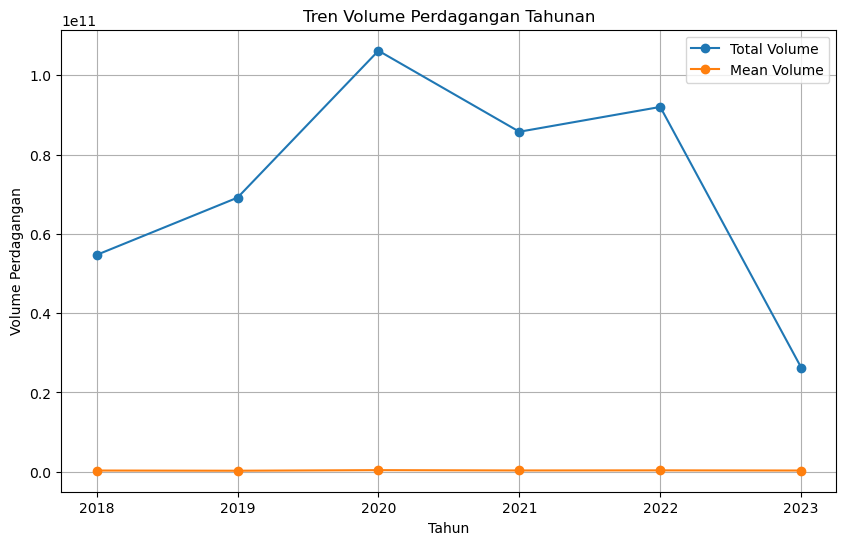

In [60]:
# Visualisasi: Tren volume perdagangan tahunan
plt.figure(figsize=(10, 6))
plt.plot(volume_per_year.index, volume_per_year['sum'], marker='o', label='Total Volume')
plt.plot(volume_per_year.index, volume_per_year['mean'], marker='o', label='Mean Volume')
plt.title('Tren Volume Perdagangan Tahunan')
plt.savefig('Tren Volume.png', dpi=300, bbox_inches='tight')
plt.xlabel('Tahun')
plt.ylabel('Volume Perdagangan')
plt.legend()
plt.grid()
plt.show()

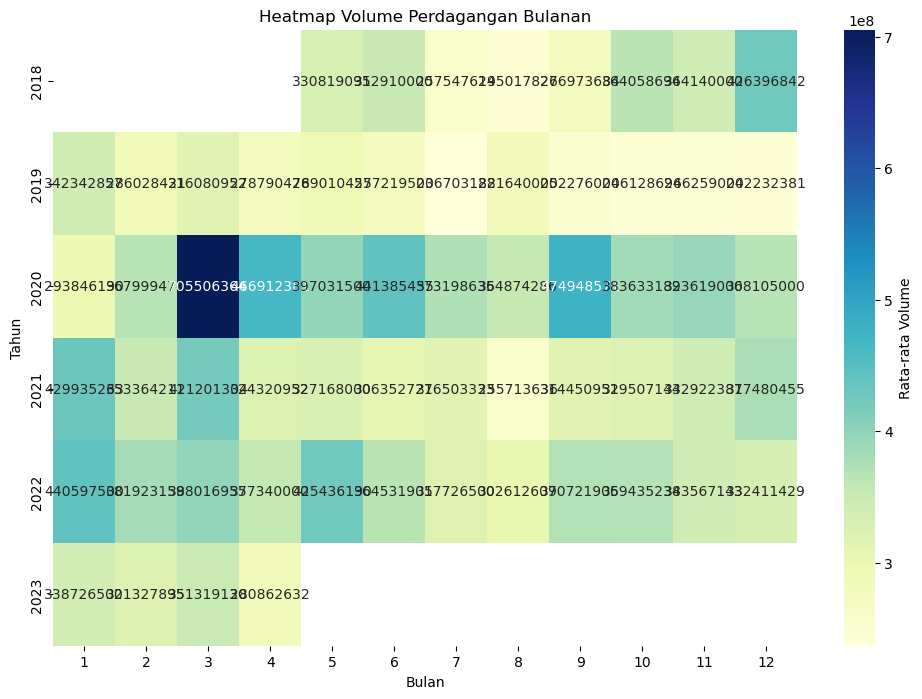

In [61]:
# Heatmap Volume Perdagangan (bulanan lintas tahun)
volume_heatmap = df.pivot_table(values='Volume', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(volume_heatmap, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Rata-rata Volume'})
plt.title('Heatmap Volume Perdagangan Bulanan')
plt.savefig('Heatmap Volume Perdagangan (Monthly).png', dpi=300, bbox_inches='tight')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

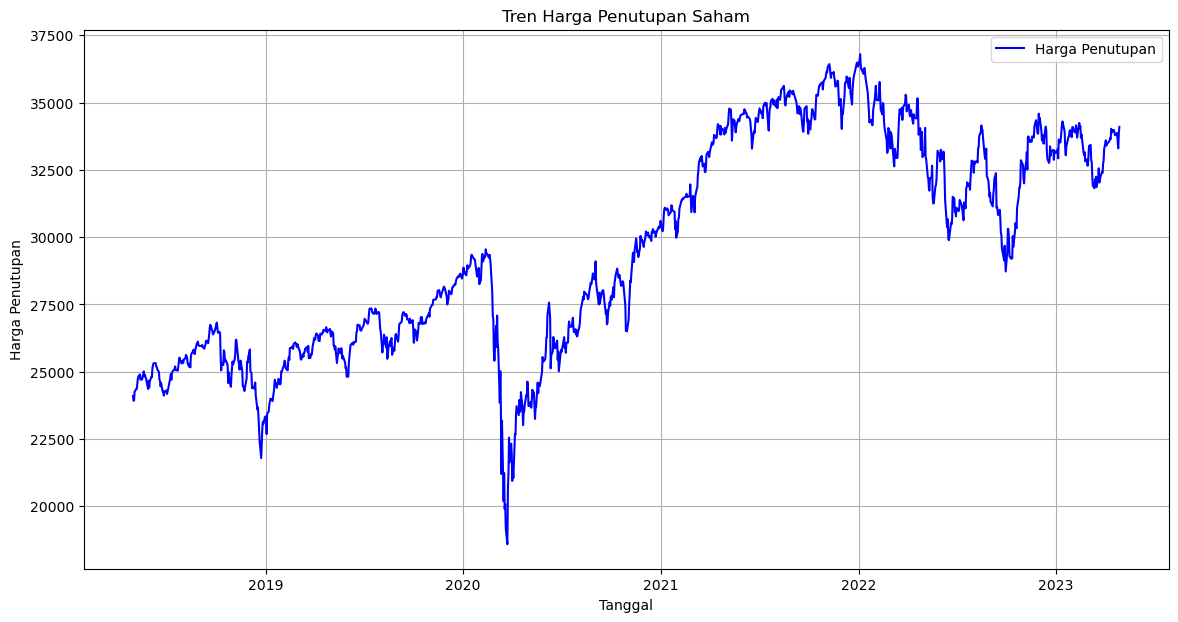

In [62]:
# Plot Harga Penutupan (Close) terhadap Waktu
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close*'], label='Harga Penutupan', color='blue')
plt.title('Tren Harga Penutupan Saham')
plt.savefig('Tren Harga Penutupan.png', dpi=300, bbox_inches='tight')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid()
plt.show()

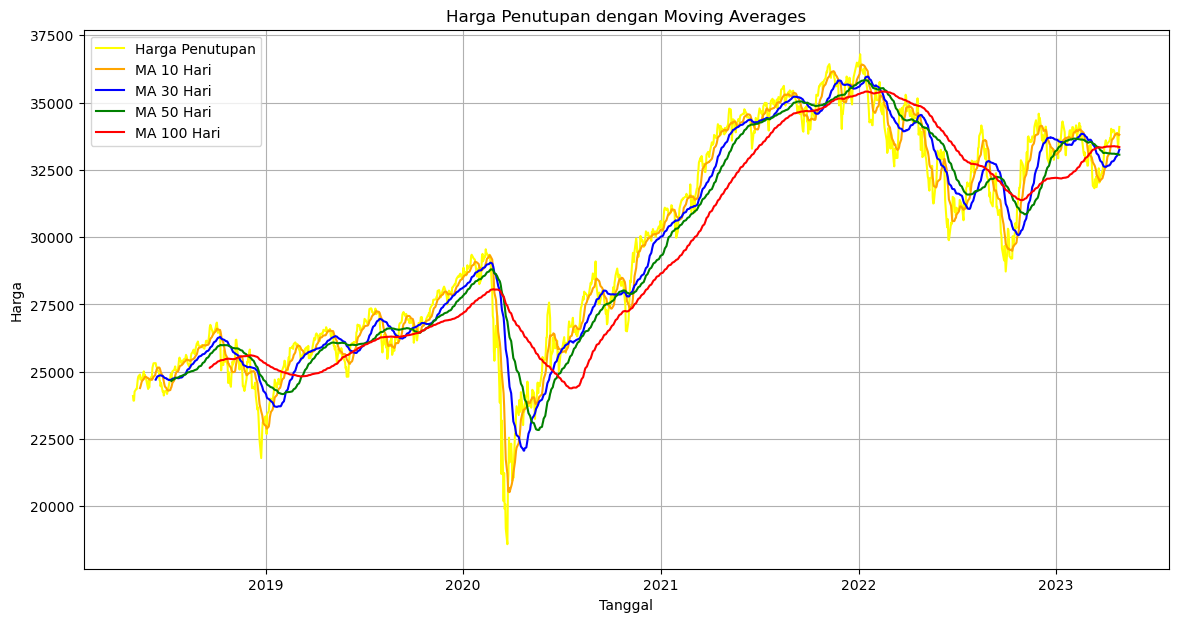

In [63]:
# Tambahkan Moving Averages (10 Hari & 50 Hari)
df['MA_10'] = df['Close*'].rolling(window=10).mean()  # Moving Average 10 hari
df['MA_30'] = df['Close*'].rolling(window=30).mean()  # Moving Average 30 hari
df['MA_50'] = df['Close*'].rolling(window=50).mean()  # Moving Average 50 hari
df['MA_100'] = df['Close*'].rolling(window=100).mean()  # Moving Average 100 hari

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close*'], label='Harga Penutupan', color='yellow')
plt.plot(df['Date'], df['MA_10'], label='MA 10 Hari', color='orange')
plt.plot(df['Date'], df['MA_30'], label='MA 30 Hari', color='blue')
plt.plot(df['Date'], df['MA_50'], label='MA 50 Hari', color='green')
plt.plot(df['Date'], df['MA_100'], label='MA 100 Hari', color='red')
plt.savefig('Harga Penutupan (Moving Averages).png', dpi=300, bbox_inches='tight')
plt.title('Harga Penutupan dengan Moving Averages')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid()
plt.show()

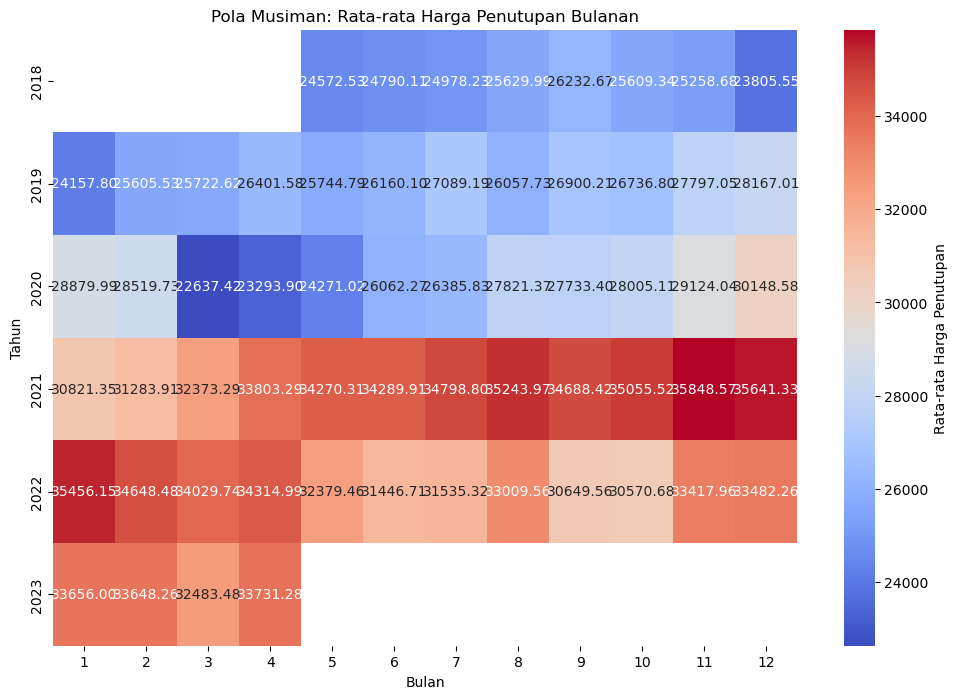

In [64]:
# Analisis Musiman: Rata-rata Harga Penutupan Bulanan
monthly_avg_close = df.groupby(['Year', 'Month'])['Close*'].mean().reset_index()
monthly_avg_close_pivot = monthly_avg_close.pivot(index='Year', columns='Month', values='Close*')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_close_pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Rata-rata Harga Penutupan'})
plt.title('Pola Musiman: Rata-rata Harga Penutupan Bulanan')
plt.savefig('Pola Musiman (Rata-rata Harga Penutupan).png', dpi=300, bbox_inches='tight')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

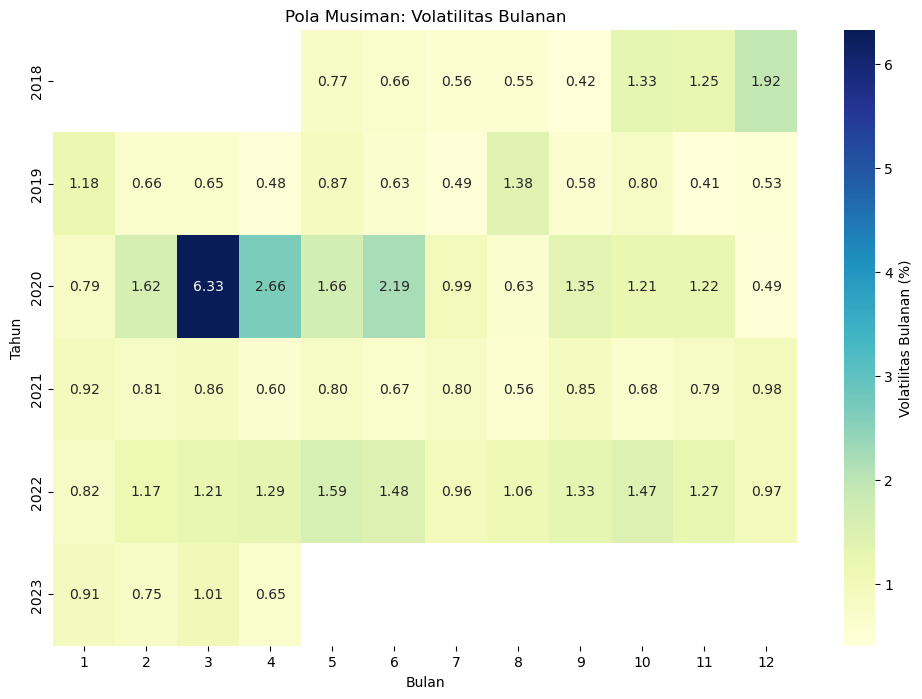

In [65]:
# Analisis Volatilitas: Standar Deviasi Perubahan Harga Harian Bulanan
df['Daily_Returns'] = df['Close*'].pct_change() * 100  # Persentase perubahan harga harian
monthly_volatility = df.groupby(['Year', 'Month'])['Daily_Returns'].std().reset_index()
monthly_volatility_pivot = monthly_volatility.pivot(index='Year', columns='Month', values='Daily_Returns')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_volatility_pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Volatilitas Bulanan (%)'})
plt.title('Pola Musiman: Volatilitas Bulanan')
plt.savefig('Pola Musiman (Volatilitas Bulanan).png', dpi=300, bbox_inches='tight')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

In [66]:
# Perancangan model prediksi
## Persiapan Data
df['Lag_1'] = df['Close*'].shift(1)  # Harga penutupan 1 hari sebelumnya
df['Lag_5'] = df['Close*'].shift(5)  # Harga penutupan 5 hari sebelumnya
df['Lag_10'] = df['Close*'].shift(10)  # Harga penutupan 10 hari sebelumnya
df['Lag_14'] = df['Close*'].shift(14)  # Harga penutupan 14 hari sebelumnya
df['Lag_21'] = df['Close*'].shift(21)  # Harga penutupan 21 hari sebelumnya

In [67]:
df_model = df.dropna()

In [68]:
# Fitur dan Target
X = df_model[['Lag_1', 'Lag_5', 'Lag_10', 'Lag_14','Lag_21']]
y = df_model['Close*']

In [69]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Evaluasi Model
y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 280.80057974137833
Mean Squared Error (MSE): 186515.14851387867
Root Mean Squared Error (RMSE): 431.87399610752055


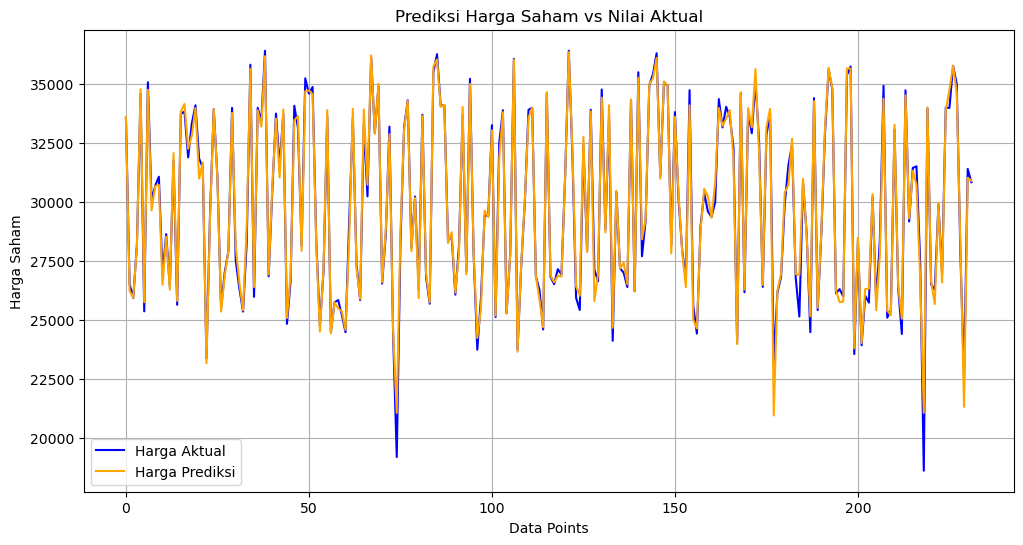

In [72]:
# Visualisasi Prediksi vs Nilai Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Harga Aktual', color='blue')
plt.plot(y_pred, label='Harga Prediksi', color='orange')
plt.title('Prediksi Harga Saham vs Nilai Aktual')
plt.savefig('Prediksi Harga Saham vs Nilai Aktual',dpi=300, bbox_inches='tight')
plt.xlabel('Data Points')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid()
plt.show()

In [73]:
# DataFrame Hasil Prediksi
result_df = pd.DataFrame({
    'Tanggal': df_model.iloc[y_test.index]['Date'],  # Ambil tanggal dari data asli
    'Harga Aktual': y_test.values,
    'Harga Prediksi': y_pred
})

# Simpan ke file CSV
result_df.to_csv('prediksi_harga_saham.csv', index=False)

print("Data hasil prediksi telah disimpan ke file 'prediksi_harga_saham.csv'")

Data hasil prediksi telah disimpan ke file 'prediksi_harga_saham.csv'


In [74]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


**KESIMPULAN**

#### **1. Periode dengan Aktivitas Perdagangan Tertinggi**
Berdasarkan analisis volume perdagangan saham, periode **tahun 2020** menunjukkan aktivitas perdagangan tertinggi. Hal ini mungkin disebabkan oleh kondisi pasar yang fluktuatif, seperti akibat pandemi COVID-19, yang meningkatkan aktivitas beli dan jual saham secara signifikan.

#### **2. Kapan Harga Saham Cenderung Naik atau Turun**
- **Harga saham cenderung naik** ketika terjadi peningkatan volume perdagangan yang stabil, diiringi dengan indikator teknikal seperti Moving Average (MA) menunjukkan tren bullish (misalnya, MA jangka pendek melampaui MA jangka panjang).
- **Harga saham cenderung turun** ketika ada lonjakan volume perdagangan yang signifikan tanpa dukungan kenaikan harga (indikasi aksi jual besar-besaran), atau ketika harga menembus garis support pada analisis teknikal.

#### **3. Pola Musiman atau Pola Volatilitas yang Perlu Diwaspadai**
- **Pola Musiman**: Harga saham menunjukkan fluktuasi musiman tertentu, misalnya:
  - **Kuartal pertama tahun (Q1)**: Cenderung lebih volatil karena investor sering menyesuaikan portofolio di awal tahun.
  - **Kuartal keempat tahun (Q4)**: Harga saham cenderung menguat karena "window dressing" atau strategi akhir tahun untuk memperbaiki performa portofolio.

- **Pola Volatilitas**:
  - Volatilitas tertinggi terjadi pada tahun 2020, saat kondisi pasar sangat tidak stabil karena pandemi. Hal ini menunjukkan bahwa faktor eksternal (seperti krisis ekonomi global atau kebijakan moneter) sangat memengaruhi volatilitas harga saham.
  - Perlu diwaspadai pola volatilitas tinggi yang biasanya muncul setelah laporan keuangan perusahaan dirilis atau ketika ada berita besar terkait industri.

---




**REKOMENDASI**

1. **Bagi investor jangka panjang**, fokus pada periode stabil dengan tren kenaikan harga saham, dan hindari perdagangan saat volatilitas terlalu tinggi.
2. **Bagi trader harian**, manfaatkan momen volatilitas tinggi dengan strategi trading yang berbasis analisis teknikal dan sinyal dari indikator Moving Average.
3. Tetap memantau faktor eksternal seperti laporan keuangan, kebijakan pemerintah, dan kondisi pasar global karena sangat memengaruhi pergerakan saham.